In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

SHEET_ID = "1uag_EHIpRTyykQFWzIN6hjBPhMk0EXLU7_RQN3mNygo"

url = f"https://docs.google.com/spreadsheets/d/{SHEET_ID}/export?format=csv"
df = pd.read_csv(url)

df.head()


,Time (s),Posititon (m),Velocity (m/s),Acceleration (m/s^2),Unnamed: 4,Monte Carlo - Random Initial Velocities,Unnamed: 6,Unnamed: 7,Time (s).1,Position (m),...,Unnamed: 22,Time (s).4,Position (m).3,Velocity (m/s).4,Acceleration (m/s^2).4,Unnamed: 27,Time (s).5,Position (m).4,Velocity (m/s).5,Acceleration (m/s^2).5
0,0.0,0.000,20.00,-9.8,NaN,NaN,NaN,NaN,0.0,0.000000,...,NaN,0.0,0.000000,-9.800000,19.58935,NaN,0.0,0.000000,19.589350,-9.8
1,0.1,1.902,19.02,-9.8,NaN,Initial Velocity (m/s),19.81723035,NaN,0.1,1.883723,...,NaN,0.1,-0.784106,-7.841065,19.58935,NaN,0.1,1.860935,18.609350,-9.8
2,0.2,19.942,18.04,-9.8,NaN,NaN,19.71403701,NaN,0.2,3.669446,...,NaN,0.2,-1.372319,-5.882130,19.58935,NaN,0.2,2.233122,3.721870,-9.8
3,0.3,37.002,17.06,-9.8,NaN,NaN,20.28883262,NaN,0.3,5.357169,...,NaN,0.3,-1.764639,-3.923195,19.58935,NaN,0.3,2.493653,2.605309,-9.8
4,0.4,53.082,16.08,-9.8,NaN,NaN,20.10669961,NaN,0.4,6.946892,...,NaN,0.4,-1.961065,-1.964260,19.58935,NaN,0.4,2.769071,2.754184,-9.8


In [24]:
v0_mean = df["Velocity (m/s)"].mean()
v0_std = df["Velocity (m/s)"].std()


In [25]:
df[["Velocity (m/s)", "Acceleration (m/s^2)"]].describe()


,Velocity (m/s),Acceleration (m/s^2)
count,39.000000,3.900000e+01
mean,1.380000,-9.800000e+00
std,11.173719,7.198313e-15
min,-17.240000,-9.800000e+00
25%,-7.930000,-9.800000e+00
50%,1.380000,-9.800000e+00
75%,10.690000,-9.800000e+00
max,20.000000,-9.800000e+00


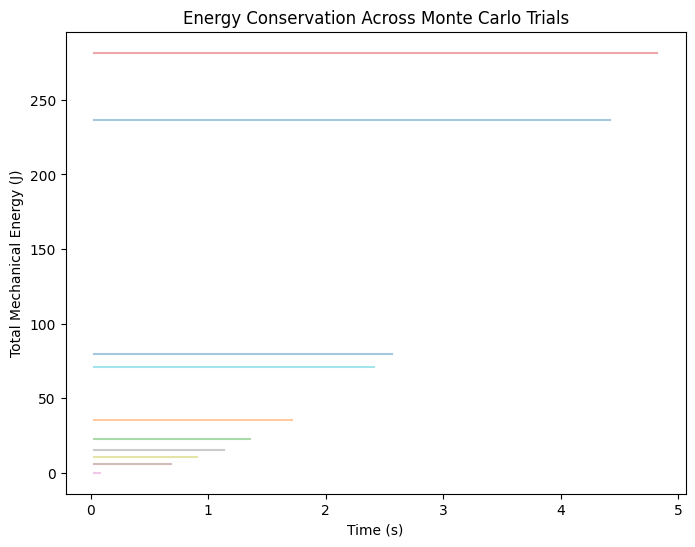

In [30]:
m = 1.0  # kg
g = 9.81
time = np.linspace(0, 5, 200)

plt.figure(figsize=(8,6))

for _ in range(20):
    v0 = np.random.normal(loc=v0_mean, scale=v0_std)

    v = v0 - g * time
    y = v0 * time - 0.5 * g * time**2
    y[y < 0] = 0

    KE = 0.5 * m * v**2
    PE = m * g * y
    E_total = KE + PE

    mask = y > 0
    plt.plot(time[mask], E_total[mask], alpha=0.4)

plt.xlabel("Time (s)")
plt.ylabel("Total Mechanical Energy (J)")
plt.title("Energy Conservation Across Monte Carlo Trials")
plt.show()


In [27]:
heights = np.array(heights)

print("Mean max height:", heights.mean())
print("Variance:", heights.var())
print("Standard deviation:", heights.std())


Mean max height: 3.0548810076456436
Variance: 47.779162912447354
Standard deviation: 6.912247312737541


In [ ]:
# Ground constraint applied for visualization;
# post-impact dynamics are not modeled


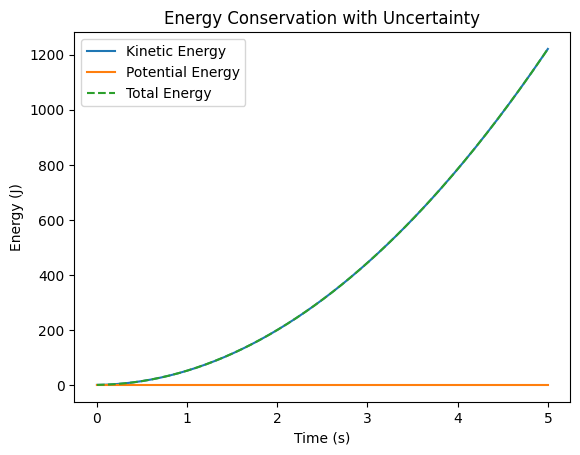

In [28]:
m = 1.0  # kg

v = v0 - g * time
KE = 0.5 * m * v**2
PE = m * g * y
E_total = KE + PE

plt.plot(time, KE, label="Kinetic Energy")
plt.plot(time, PE, label="Potential Energy")
plt.plot(time, E_total, label="Total Energy", linestyle="--")
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Energy (J)")
plt.title("Energy Conservation with Uncertainty")
plt.show()


In [29]:
import numpy as np

heights = np.array(heights)

print("Mean max height:", heights.mean())
print("Std dev:", heights.std())
print("Min:", heights.min())
print("Max:", heights.max())


Mean max height: 3.0548810076456436
Std dev: 6.912247312737541
Min: 0.0
Max: 39.91728518207964
